In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/cleaned_data.csv', dtype={'article_id': str,'customer_id': str})

In [2]:
articles = pd.read_csv("articles_hm.csv")
df_art = articles.copy()

#전처리
#1. ID 형식 통일
df_art['article_id'] = df_art['article_id'].astype(str).str.zfill(10)

#2. 결측치(NULL) 제어 (detail_desc의 NULL값을 No Description로)
df_art['detail_desc'] = df_art['detail_desc'].fillna('No Description')

#3. 불필요 컬럼 제거 (메모리 줄이기) : Name(이름)이 존재하여 중복 정보인 Code(코드성 숫자) 컬럼 불필요
cols_to_drop = [
    'product_type_no', 
    'graphical_appearance_no', 
    'colour_group_code', 
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'department_no',
    'index_code',
    'index_group_no',
    'section_no',
    'garment_group_no'
]
df_art_cleaned = df_art.drop(columns=cols_to_drop) 

C:\Users\user\AppData\Local\Temp\ipykernel_13108\2120107130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


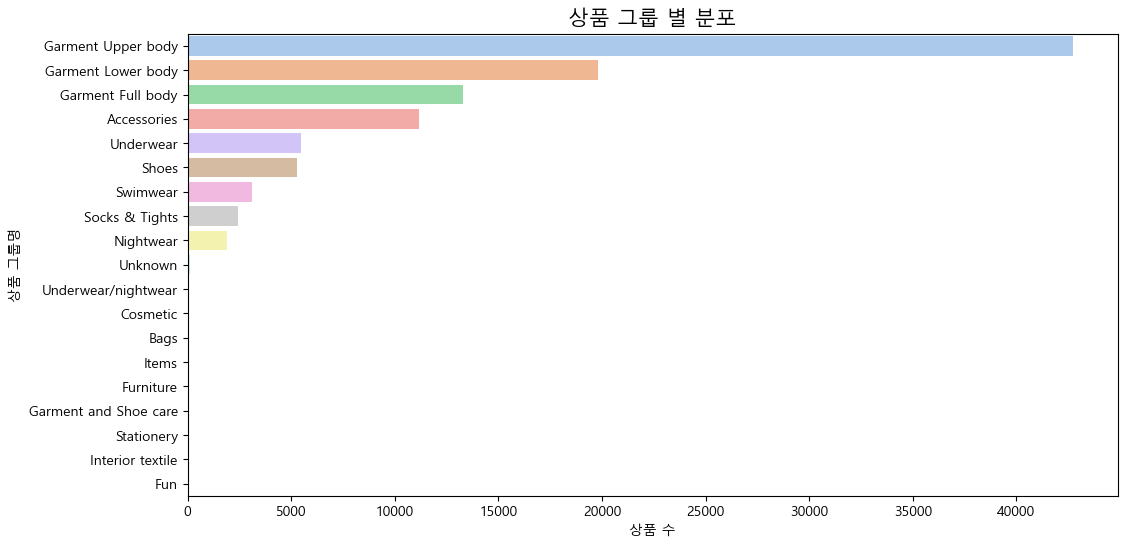

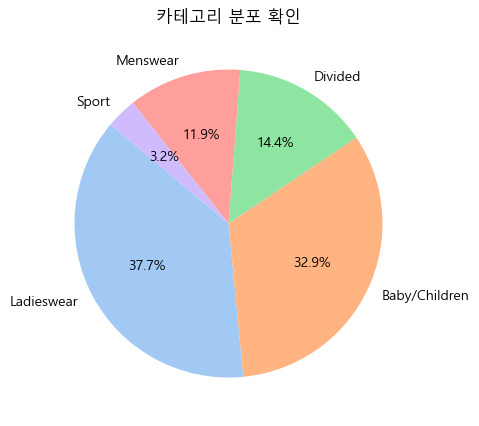

In [3]:
## [articles] EDA 시각화

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. product_group_name(상품 그룹) 분포 확인 (가로형 막대그래프), 내림차순
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_art_cleaned, 
    y='product_group_name', 
    order=df_art_cleaned['product_group_name'].value_counts().index,
    palette='pastel'
)
plt.title('상품 그룹 별 분포', fontsize=15)  
plt.xlabel('상품 수')
plt.ylabel('상품 그룹명')
plt.show()

# 2. 카테고리 분포 확인
plt.figure(figsize=(5, 5))
df_art_cleaned['index_group_name'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel'),
    ylabel=''   #ylabel False로 설정(위치변경)
)
plt.title('카테고리 분포 확인')
plt.show()

##### 여기부터는 조인한 이후(df)로 간단하게 정리한 것

In [4]:
print("전체 카테고리에서 어떤 카테고리가 가장 판매량이 높은가 (top10)")
total_top_products = df['prod_name'].value_counts().head(10)
print(total_top_products)

전체 카테고리에서 어떤 카테고리가 가장 판매량이 높은가 (top10)
prod_name
Jade HW Skinny Denim TRS       5919
Luna skinny RW                 4561
Timeless Midrise Brief         2948
Despacito                      2749
Cat Tee.                       2629
Kanta slacks RW                2574
Simple as That Triangle Top    2499
Skinny Ankle R.W Brooklyn      2437
Tilly (1)                      2249
Shake it in Balconette         2211
Name: count, dtype: int64


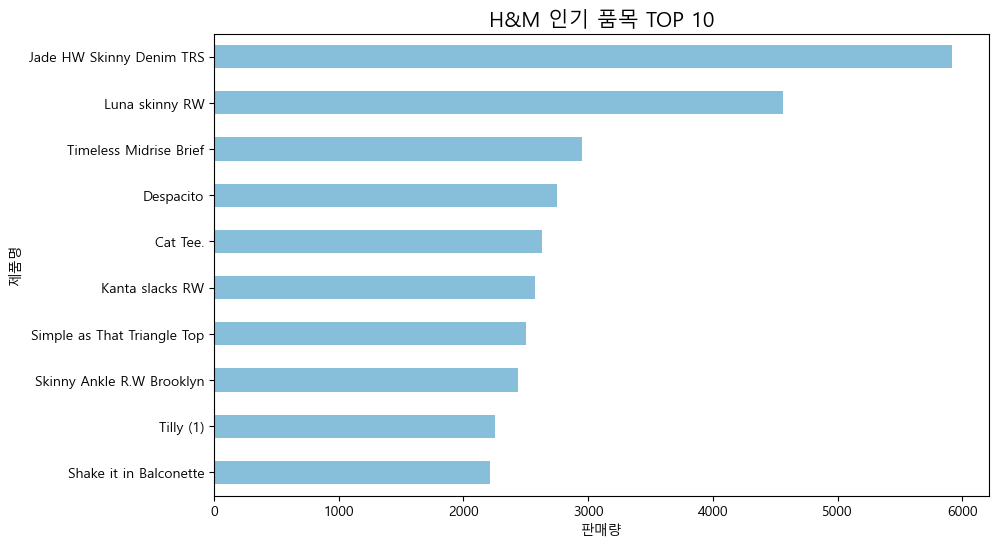

In [5]:
df['prod_name'].value_counts().head(10).plot(
    kind='barh', #가로로 볼거임
    color=sns.color_palette('RdBu_r')[1],   #그냥 통일합시다 어 어지러워 색 하나만 씁시다;;
    figsize=(10, 6)
).invert_yaxis()    #내림차순

plt.title('H&M 인기 품목 TOP 10', fontsize=15)
plt.xlabel('판매량')
plt.ylabel('제품명')    #삭제해도 무방
plt.show()

### 일반 제품 내 상위 실제 판매량 순위별로
- 1 : 데님 **팬츠**
- 2 : 스키니 **팬츠**
- 3 : 이너웨어 **하의**
- 4 : 데스..파..시..또... (티셔츠/상의 계열)
- 5 : 캐주얼 상의 (고양이 티셔츠)
- 6 : **슬랙스**(포멀한 정장 계열)
- 7 : 이너웨어 상의
- 8 : 스키니 **팬츠**
- 9 : 이너웨어 상의
- 10 : 이너웨어 상의

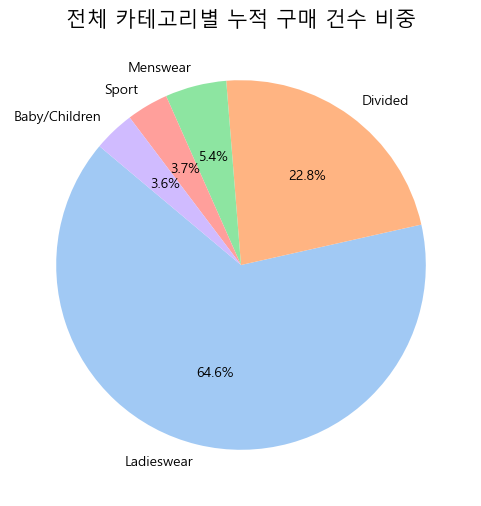

category_main
Ladieswear       672139
Divided          236753
Menswear          55812
Sport             38008
Baby/Children     37389
Name: count, dtype: int64


In [6]:
# 카테고리 거래 건수
category_counts = df['category_main'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%',
    startangle=140, 
    colors=sns.color_palette('pastel'),
)

plt.title('전체 카테고리별 누적 구매 건수 비중', fontsize=15)
plt.show()

#실제 카테고리 별 거래량
print(category_counts)

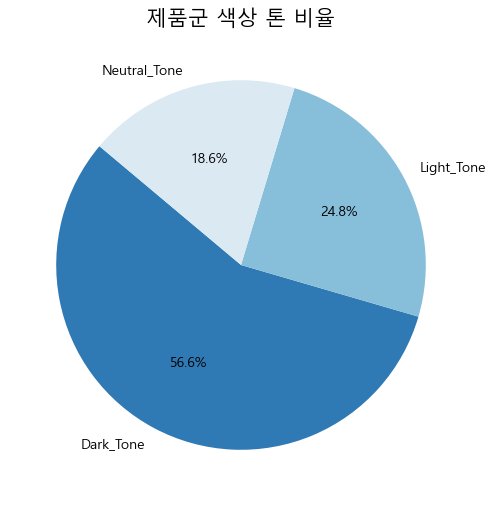

In [7]:
# 제품군 색상 톤 비율
tone_counts = df['color_tone'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    tone_counts, 
    labels=tone_counts.index, 
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('RdBu_r'))
plt.title('제품군 색상 톤 비율', fontsize=15)
plt.show()

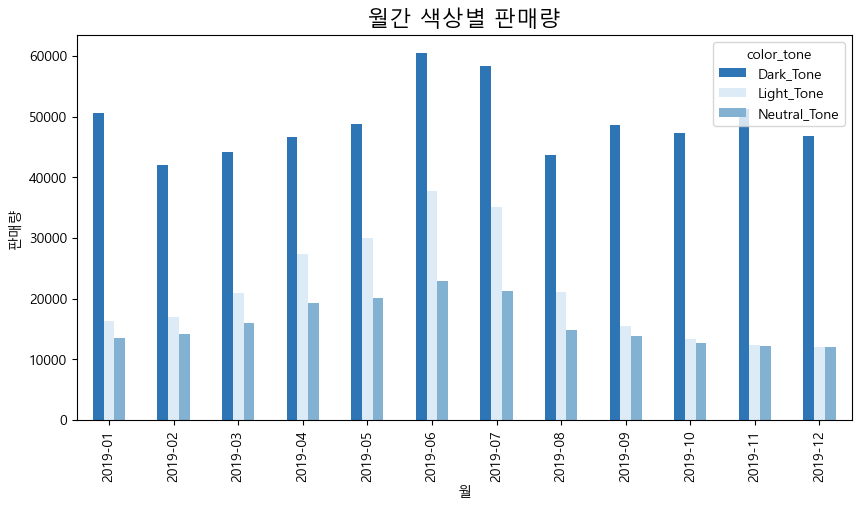

In [8]:
#월간 색상별 판매량
tone_trend = df.groupby(['year_month', 'color_tone']).size().unstack(fill_value=0)  #가로로 펼치고 없으면 0으로 채워~
### 색을 위 파이차트랑 통일하려면
my_tones = ['#2E75B6', '#DDEBF7', '#82B1D1']

tone_trend.plot(
    kind='bar', #area로 두는 게 낫나? 어.... barh? 일단 line은 안되고 그냥 bar로 하고 팀원들과 상의
    # stacked=True,     #이것도 상의 (area, bar로 결정되면) line이면 marker='o'도 붙이쉐이
    # color=sns.color_palette('vlag'),
    color = my_tones,
    figsize=(10, 5)
)

plt.title('월간 색상별 판매량', fontsize=16)
plt.ylabel('판매량')
plt.xlabel('월')
plt.show()

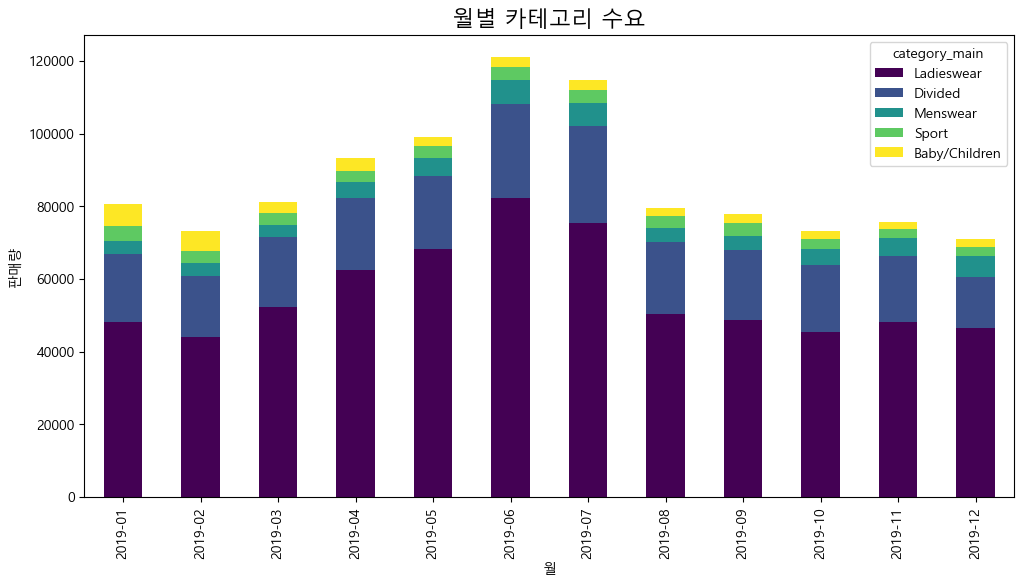

In [9]:
# #월별 카테고리 수요

category_data = df.groupby(['year_month', 'category_main']).size().unstack(fill_value=0)

# category_data.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='mako',width=0.8)

## 가독성이 안좋아서 다시 재배치하고 인덱스 부여한 후 정렬
category_sequence = category_data.sum().sort_values(ascending=False).index
category_data[category_sequence].plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='viridis')

plt.title('월별 카테고리 수요', fontsize=16)
plt.ylabel('판매량')
plt.xlabel('월')
plt.show()

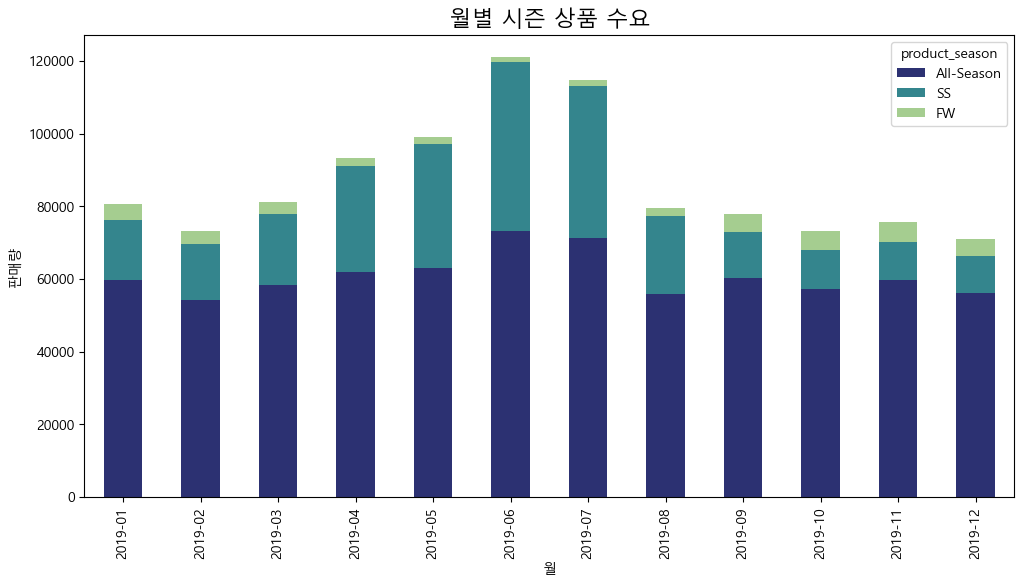

In [10]:
#시즌별 카테고리 수요

season_data = df.groupby(['year_month', 'product_season']).size().unstack(fill_value=0)
#너도 안되겠다
season_sequence = season_data.sum().sort_values(ascending=False).index
season_data[season_sequence].plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='crest_r') #로꾸거

plt.title('월별 시즌 상품 수요', fontsize=16)
plt.ylabel('판매량')
plt.xlabel('월')
plt.show()

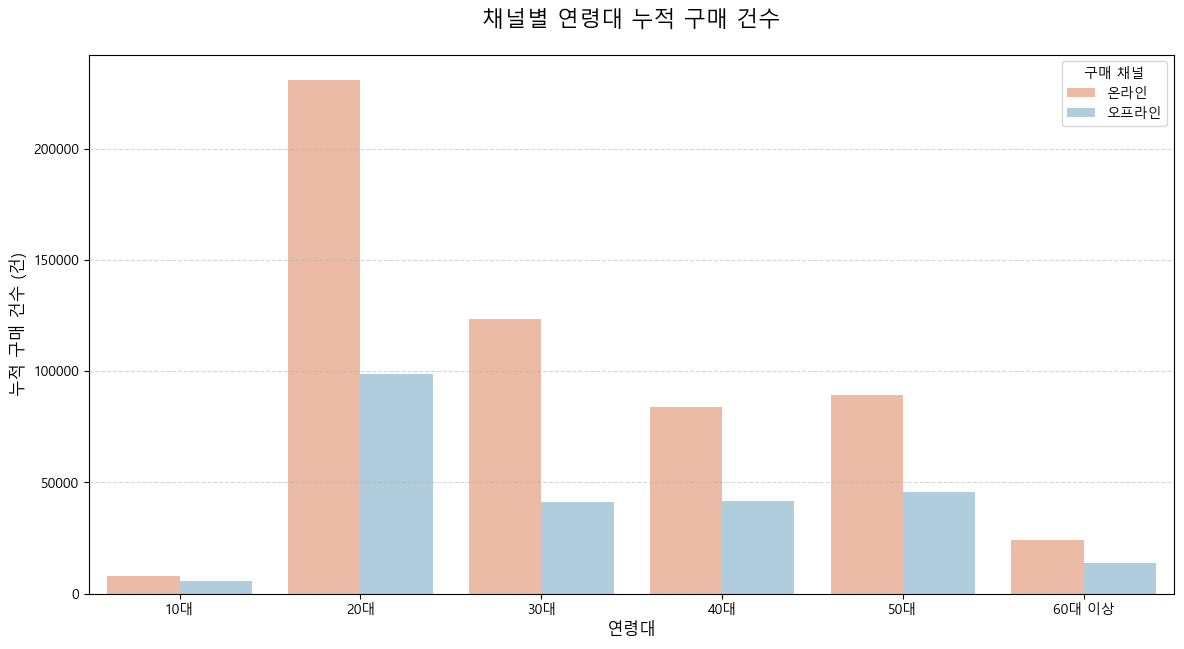

In [11]:
#채널별 연령대 누적 구매 건수
plt.figure(figsize=(14, 7))

sns.countplot(
    data=df, 
    x='age_segment', 
    hue='channel', 
    order=['10대', '20대', '30대', '40대', '50대', '60대 이상'],
    palette='RdBu'
)

plt.title('채널별 연령대 누적 구매 건수', fontsize=16, pad=20)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('누적 구매 건수 (건)', fontsize=12)  #df_merged 행의 개수(=거래 개수)
plt.legend(title='구매 채널')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


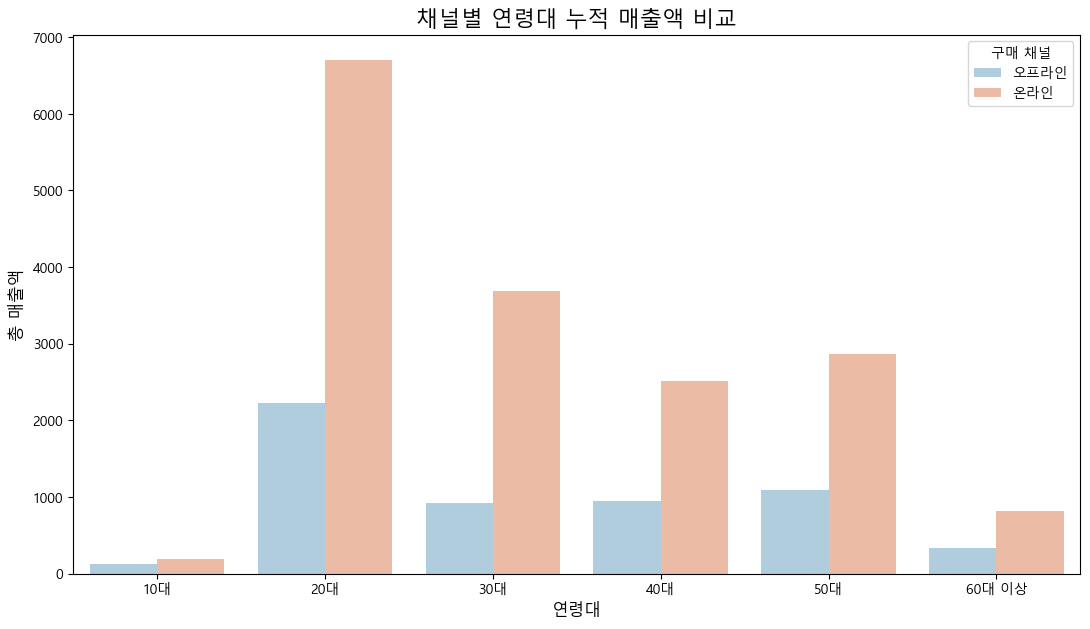

In [12]:
## 채널별 연령대 누적 매출액 (실질적인 매출 기여도)
df_sales = df.groupby(['age_segment', 'channel'])['price'].sum().reset_index()

plt.figure(figsize=(13, 7))
sns.barplot(
    data=df_sales, 
    x='age_segment', 
    y='price', 
    hue='channel',
    palette='RdBu_r',
    order=['10대', '20대', '30대', '40대', '50대', '60대 이상']
)

plt.title('채널별 연령대 누적 매출액 비교', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('총 매출액', fontsize=12)
plt.legend(title='구매 채널', loc='upper right')

plt.show()

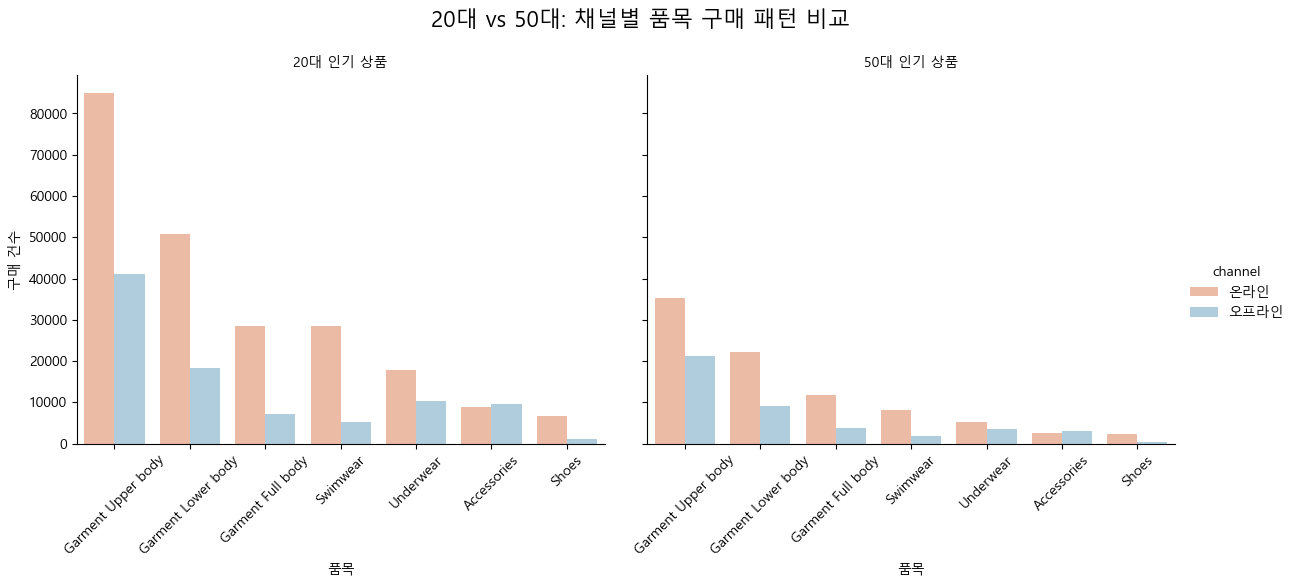

In [13]:
## 20대 VS 50대
df_target = df[df['age_segment'].isin(['20대', '50대'])]

# 20대와 50대를 옆으로 나란히 배치하여 비교
age_vs = sns.catplot(
    data=df_target, 
    x='product_group_name', 
    hue='channel', 
    col='age_segment', 
    col_order=['20대', '50대'], #20대가 먼저 오도록 수정
    kind='count',
    height=5, aspect=1.2,   #그래프 크기~ 데이터 두개 붙인거라(다중그래프) 모양 어케나올지 모르니까 figsize보다 이거 추천. (한 칸의 세로 높이 대 그거 대 가로비율)
    palette='RdBu',
    order=df_target['product_group_name'].value_counts().head(7).index #상위 7개 품목만
)

# 3. 가독성을 위한 설정
age_vs.set_xticklabels(rotation=45)
age_vs.set_axis_labels("품목", "구매 건수")
age_vs.set_titles("{col_name} 인기 상품")
plt.subplots_adjust(top=0.85)   #치솟지마시오
age_vs.fig.suptitle('20대 vs 50대: 채널별 품목 구매 패턴 비교', fontsize=16)

plt.show()

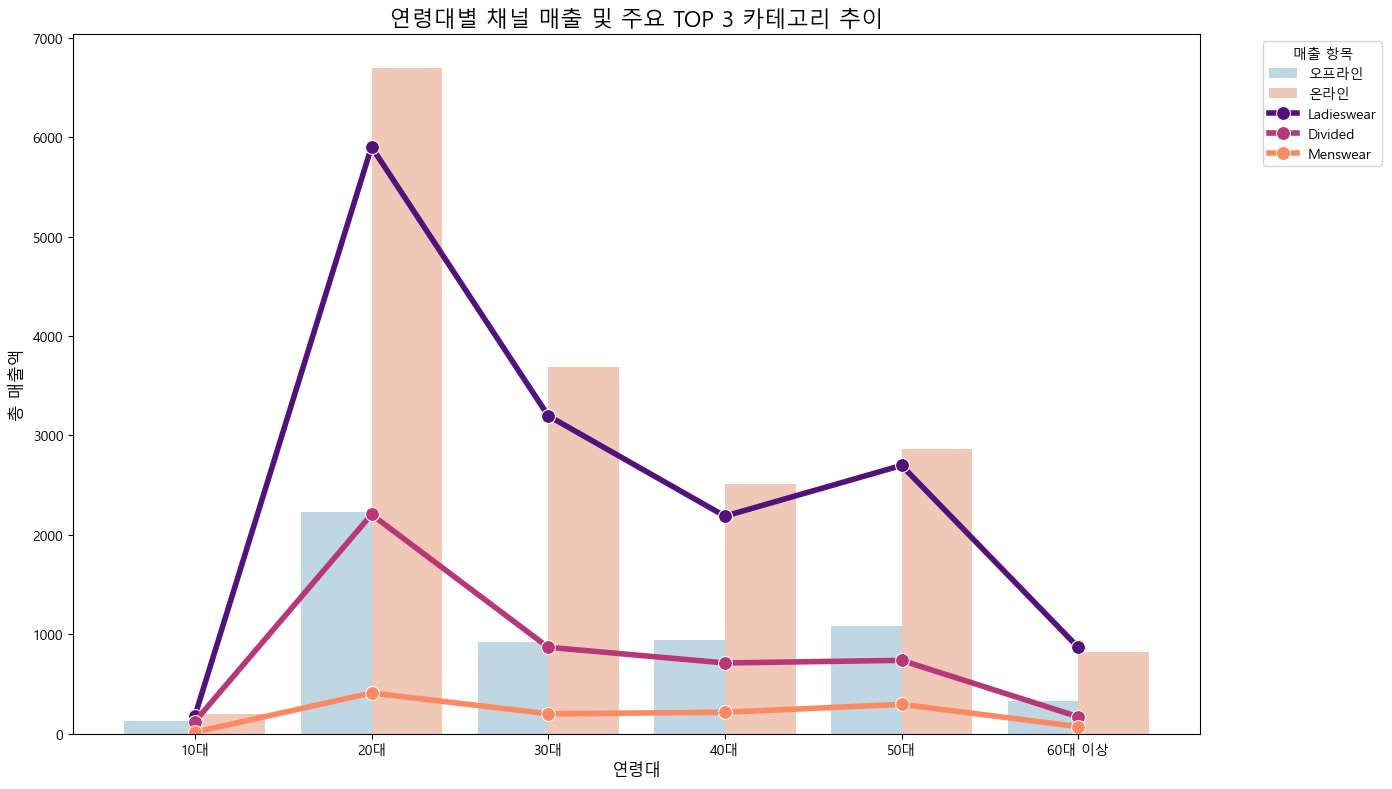

In [14]:
# 0. 위에서쓴거
df_sales = df.groupby(['age_segment', 'channel'])['price'].sum().reset_index()

# 1. 카테고리 분류해서 따로 뽑기
top_3_categories = df.groupby('category_main')['price'].sum().nlargest(3).index.tolist()    #젤큰거3개뽑기
df_cat_top3 = df[df['category_main'].isin(top_3_categories)]
#OR
#my_target_categories = ['Ladieswear', 'Divided', 'Menswear']
#df_cat_target = df[df['category_main'].isin(my_target_categories)] 해도 됨 

# 2. 합쳐서 나눠담기
df_cat_plot = df_cat_top3.groupby(['age_segment', 'category_main'])['price'].sum().reset_index()

plt.figure(figsize=(14, 8))

# 연령대별/채널별 매출
sns.barplot(
    data=df_sales, 
    x='age_segment', 
    y='price', 
    hue='channel',
    palette='RdBu_r',
    order=['10대', '20대', '30대', '40대', '50대', '60대 이상'],
    alpha=0.8
)

# 라인차트(카테고리)
sns.lineplot(
    data=df_cat_plot,
    x='age_segment',
    y='price',
    hue='category_main',
    hue_order=top_3_categories,
    marker='o',
    markersize=10,
    linewidth=4,
    palette='magma'
)

plt.title('연령대별 채널 매출 및 주요 TOP 3 카테고리 추이', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('총 매출액', fontsize=12)
plt.legend(title='매출 항목', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### color_tone 검증
* Dark_Tone :
'black', 'dark blue', 'dark grey', 'dark red', 'dark pink', 'dark purple', 'dark green', 'dark orange', 'dark beige', 'dark turquoise', 'dark yellow', 'grey', 'bronze/copper'

* Light_Tone :
'white', 'off white', 'light beige', 'light blue', 'light grey', 'light orange', 'light pink', 'light green', 'light red', 'light yellow', 'light purple', 'transparent', 'light turquoise'

* Neutral_Tone :
'blue', 'red', 'purple', 'green', 'beige', 'pink', 'silver', 'gold', 'yellow', 'orange', 'turquoise', 'greyish beige', 'yellowish brown', 'greenish khaki', 'other' 시리즈 전체, 'unknown'

* 특이사항 : Other, Unknown는 기타 항목이나 Neutral_Tone에 포함됨

[애매한 녀석들]

1. Light Grey / Light Beige → Light_Tone
2. Silver / Gold → Neutral_Tone
3. Bronze / Copper / Grey → Dark_Tone
4. Transparent → Light_Tone
5. Dark Yellow / Dark Turquoise / Dark Beige → Dark_Tone
6. Other ~~ / Unknown → Neutral_Tone


blue, red 이런 원색도 채도가 높아서 dark로 분류하려다가 그냥 dark 붙은 친구들만 넣고 수정했습니다!! 그래도 압도적으로 많네요.... 수정해서 조금 더 줄어들 줄 알았는데 카테고리 제품 내 다크톤 비중이 크다는 근거로는 충분할 것 같습니다!

In [15]:
##### 검증을 위한 확인
print(df['colour_group_name'].unique())
print("---------------")
print(df['section_name'].unique())

<StringArray>
[      'Dark Blue',           'White',           'Black',           'Beige',
             'Red',            'Pink',     'Dark Yellow',            'Blue',
     'Light Beige',      'Light Pink',      'Dark Beige',      'Dark Green',
      'Light Blue', 'Yellowish Brown',            'Grey',       'Off White',
          'Yellow',           'Green',  'Greenish Khaki',      'Light Grey',
    'Light Orange',          'Orange',       'Dark Grey',        'Dark Red',
       'Light Red',       'Dark Pink',       'Other Red',     'Dark Orange',
          'Silver',       'Turquoise',     'Light Green',    'Light Purple',
  'Dark Turquoise',    'Other Yellow',      'Other Pink',     'Other Green',
    'Light Yellow', 'Light Turquoise',            'Gold', 'Other Turquoise',
   'Bronze/Copper',          'Purple',           'Other',    'Other Purple',
     'Dark Purple',   'Greyish Beige',      'Other Blue',    'Other Orange',
     'Transparent',         'Unknown']
Length: 50, dtype: str


### product_season 검증
sports 라인의 socks, jacket 그리고 잘못 기입된 키워드 nightwear가 전부 FW로 분류되는 사고가 있었습니다! 로직 순서를 SS- > FW -> All_season으로 바꿔서 키워드 우선도를 바꿨어요
if~elif 라인 중 FW 키워드가 너무 포괄적으로 잡혀있음을 확인했습니다! SS 우선도(분류하기 쉬운 수영복)으로 바꾸고 FW 범위를 좁혀서(니트, 울, 이런 것만 잡히게) 수정했습니다!
최종 완성 분류는 이렇습니다!



In [16]:
print(df['product_season'].unique())

<StringArray>
['All-Season', 'SS', 'FW']
Length: 3, dtype: str


In [17]:
print(df[df['product_season'] == 'FW']['section_name'].unique())
print("\n------------")
print(df[df['product_season'] == 'SS']['section_name'].unique())
print("\n------------")
print(df[df['product_season'] == 'All-Season']['section_name'].unique())

<StringArray>
[                'Womens Jackets',                 'Divided Basics',
             'Divided Collection',                 'Collaborations',
               'Divided Selected',                  'Womens Casual',
     'Womens Everyday Collection',                 'Kids Outerwear',
                  'Men Underwear',        'Boys Underwear & Basics',
         'Womens Big accessories',               'Womens Tailoring',
  'Baby Essentials & Complements', 'Womens Nightwear, Socks & Tigh',
                   'Womens Trend',            'Special Collections',
                 'Mens Outerwear',                'Men Accessories',
       'Womens Small accessories',            'Divided Accessories',
           'Kids Local Relevance',                   'Ladies Denim',
      'Divided Complements Other',              'Divided Asia keys',
                 'Womens Premium',                           'H&M+',
             'Contemporary Smart',               'Divided Projects',
            'Contemp

In [18]:
print(df[df['product_season'] == 'FW']['prod_name'].unique())
print("\n------------")
print(df[df['product_season'] == 'SS']['prod_name'].unique())
print("\n------------")
print(df[df['product_season'] == 'All-Season']['prod_name'].unique())

<StringArray>
[        'Baloo Hood Padded',              'Becka hoodie',
        'Aruba denim jacket',           'PE DANIELA COAT',
          'Calgary Cardigan',           'Sean wool biker',
  'Maltese trow on cardigan',            'Barry cardigan',
 'Girona throw on wool coat',               'Furi tights',
 ...
      'BB BEANIE JERSEY OWN',          'BUCKET HAT BASIC',
          'CE Anderson coat',           'FLORINA fur jkt',
   'Christy Pile Jacket (1)',          'SB Parker Hybrid',
       'DIV Hellas cardigan',  'PREMIUM Sasha wool scarf',
                    'Kvaser',     'NILLA stripe cardigan']
Length: 1961, dtype: str

------------
<StringArray>
[              '1pk Sportsock', 'RR 47.1/2 /3Leo shirt dress',
    'Timeless Padded Swimsuit',             'SANNA SLIP TANK',
     'Chia Seamless HW Tights',       'Vermont Summer Slacks',
              'Tory price tee',                'Locket dress',
      'Shake it in Balconette',      'LS Olivia Triangle Top',
 ...
                'S

In [ ]:
#!python -m jupyter nbconvert --to markdown "04_code_collection.ipynb"

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern '04_code collection.ipynb' matched no files
